# Simulate the Markov-Chain Proces

In [47]:
import numpy as np
import matplotlib.pyplot as plt

# States
S = [0, 1, 2]

# Transition matrix
P = np.array([[1, 0, 0],  # Absorbing state: D = 0
              [0.1, .75, 0.15],  # Bad state: D = 1
              [0.05, .1, 0.85]])  # Good state: D = 2

In [48]:
np.random.choice(3, p=P[2])

0

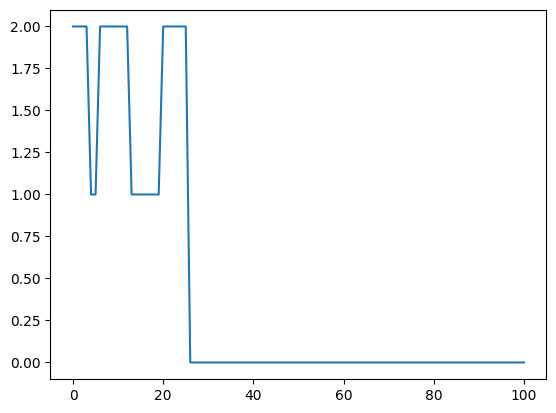

In [52]:
# Define a state transformaion process: Markov-Chain Process
def step(s):  # input will be the current state
    s_prime = np.random.choice(3, p=P[s])
    return s_prime  # output is the new state


s = 2  # initial state
s_vec = [s]  # just for plotting, not actually necessary

for i in range(100):  # basically, it would ends up at state 0, cuz it is absorbing state
    s = step(s)
    s_vec.append(s)  # just for plotting, not necessary


plt.plot(s_vec)
plt.show()

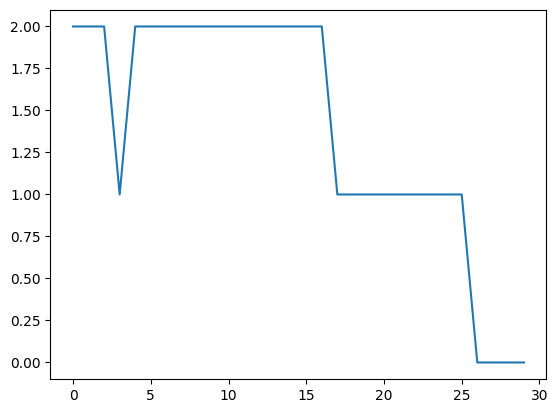

In [59]:
###actually, when the Markov chain achieve absorbing state, we do not need the ###
### simulation anymore ##
# So we modified our code to that it would stop simultion when process arrives at
# state 0.

s = 2  # initial state
s_vec = [s]  # just for plotting, not actually necessary
c = 0


while c < 4:  # basically, it would ends up at state 0, cuz it is absorbing state
    s = step(s)
    s_vec.append(s)  # just for plotting, not necessary
    if s == 0:
        c += 1


plt.plot(s_vec)
plt.show()

# Simulate the Markov-Reward Process

In [1]:
# convert to JAX
import jax.numpy as jnp
import jax
import matplotlib.pyplot as plt

# States
S = [0, 1, 2]

# Transition matrix
P = jnp.array([[1, 0, 0],  # Absorbing state: D = 0
              [0.1, .75, 0.15],  # Bad state: D = 1
              [0.05, .1, 0.85]])  # Good state: D = 2

In [2]:
# γ = time perferance
# R = Reward (Utility) funtion
γ = 0.95  # Time perference = discount factor, 越遠越不重要, that's why it is lesser than 1
R = np.array([0., 1., 2.])  # How happy I am in the specific state
# In our example, R can be dividend, means that we can gain Rt in State t, St.

In [3]:
def step(states, randomkey):  # we use core before
    next_state = jax.random.choice(randomkey, 3, p=P[states])  # s_tp1 = St+1
    D_of_next_state = states
    return next_state, D_of_next_state


s = 1  # initial state
rng = jax.random.PRNGKey(0)

n = 100000  # simulate n times


@jax.vmap
def simulate_a_path(inputs):
    state = s
    rng = jax.random.split(inputs, 100)  # 要simulate幾次就split幾次。

    D_of_last_state, D_of_each_state = jax.lax.scan(
        step, state, rng)  # substituting the for-loop
    # returning. 1. last state we achieved, 2. each state (in here, dividend) we get.
    G = (D_of_each_state*γ**jnp.arange(100)).sum()
    return G


rng = jax.random.split(rng, n)
print(simulate_a_path(rng))

[10.017268 29.101948  1.95     ...  1.       16.89464  13.459758]


it is highly inefficient. 

# Bellman Equation for Markvov-Reward Process

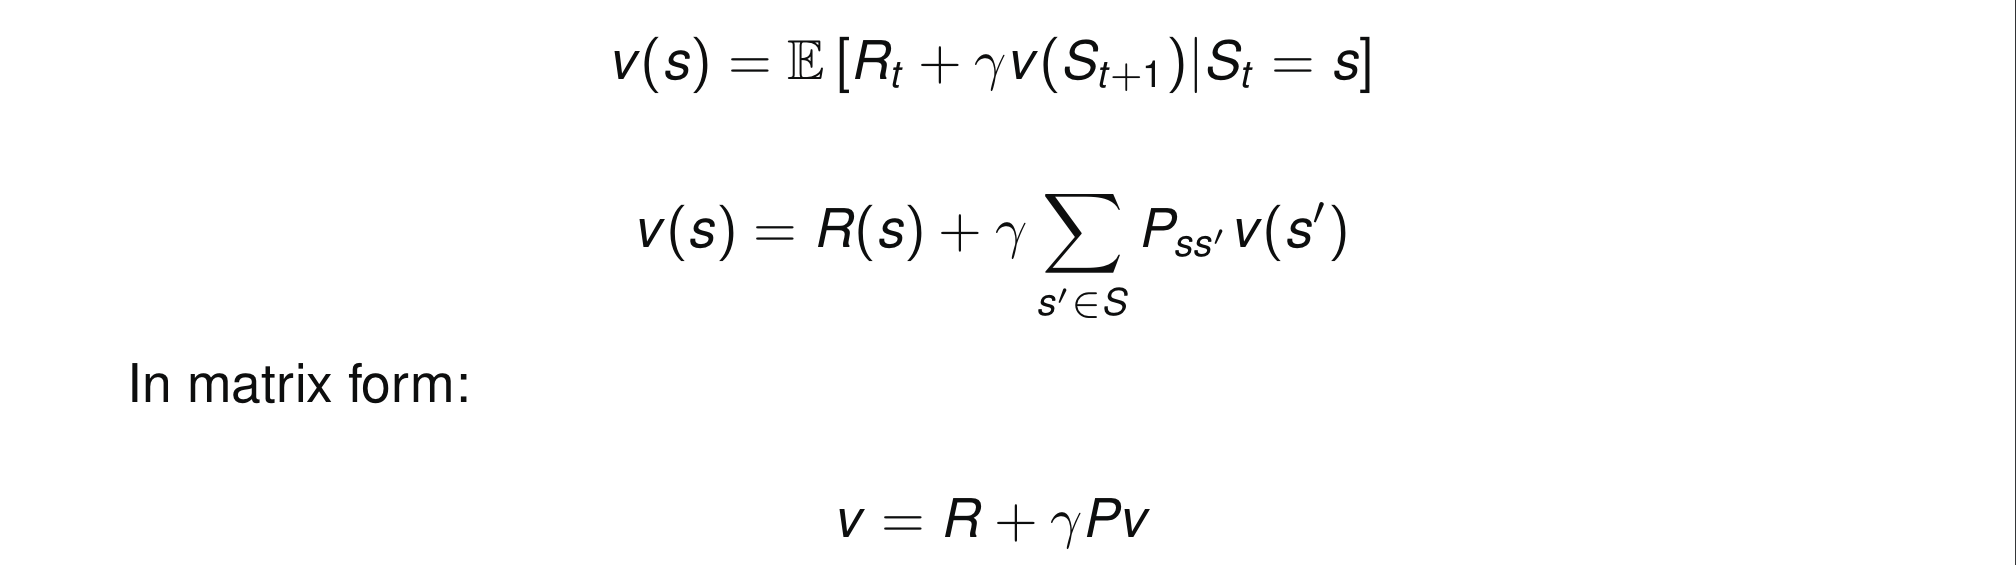

## Soving via Linear Equation (Small number of States)

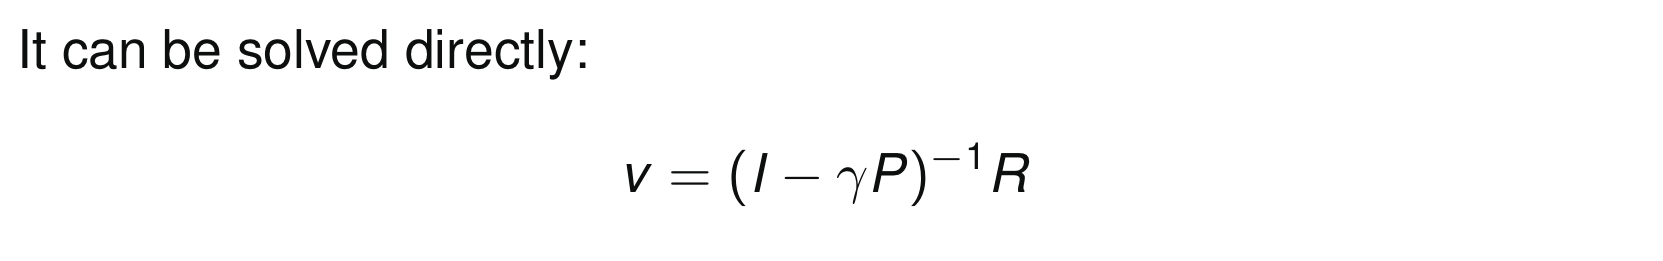

In [29]:
P = jnp.array([[1, 0, 0],  # Absorbing state: D = 0
              [0.1, .75, 0.15],  # Bad state: D = 1
              [0.05, .1, 0.85]])  # Good state: D = 2
γ = 0.95
R = jnp.array([0., 1., 2.])


# solution with linear algebra
I = jnp.eye(3)
V = jnp.linalg.inv(I - γ * P) @ R
print(V)

[-1.6509267e-06  1.1421736e+01  1.6026312e+01]


## Solving via Iterative Policy Evaluation (Large number of States)

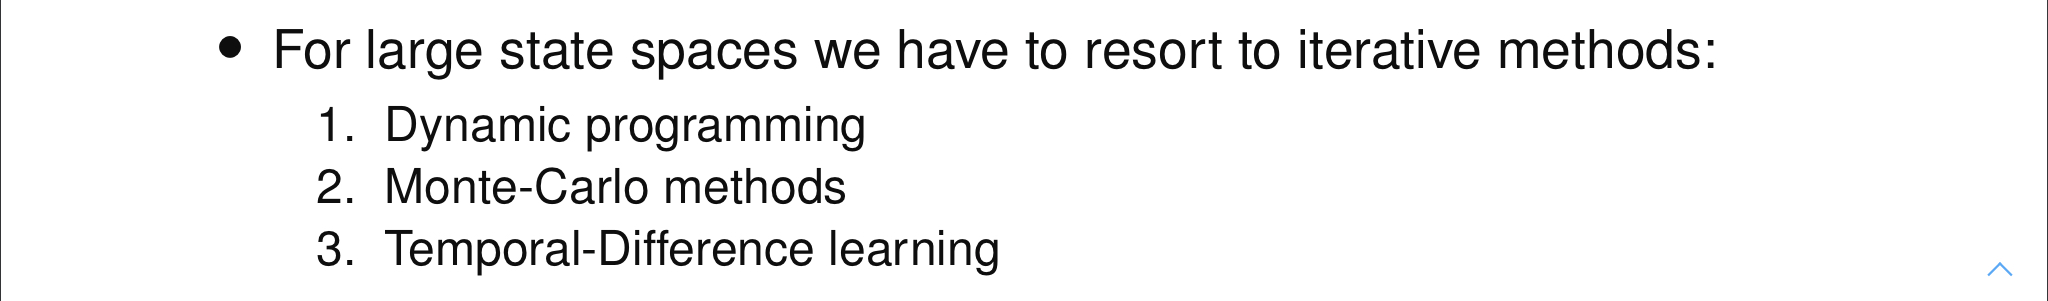

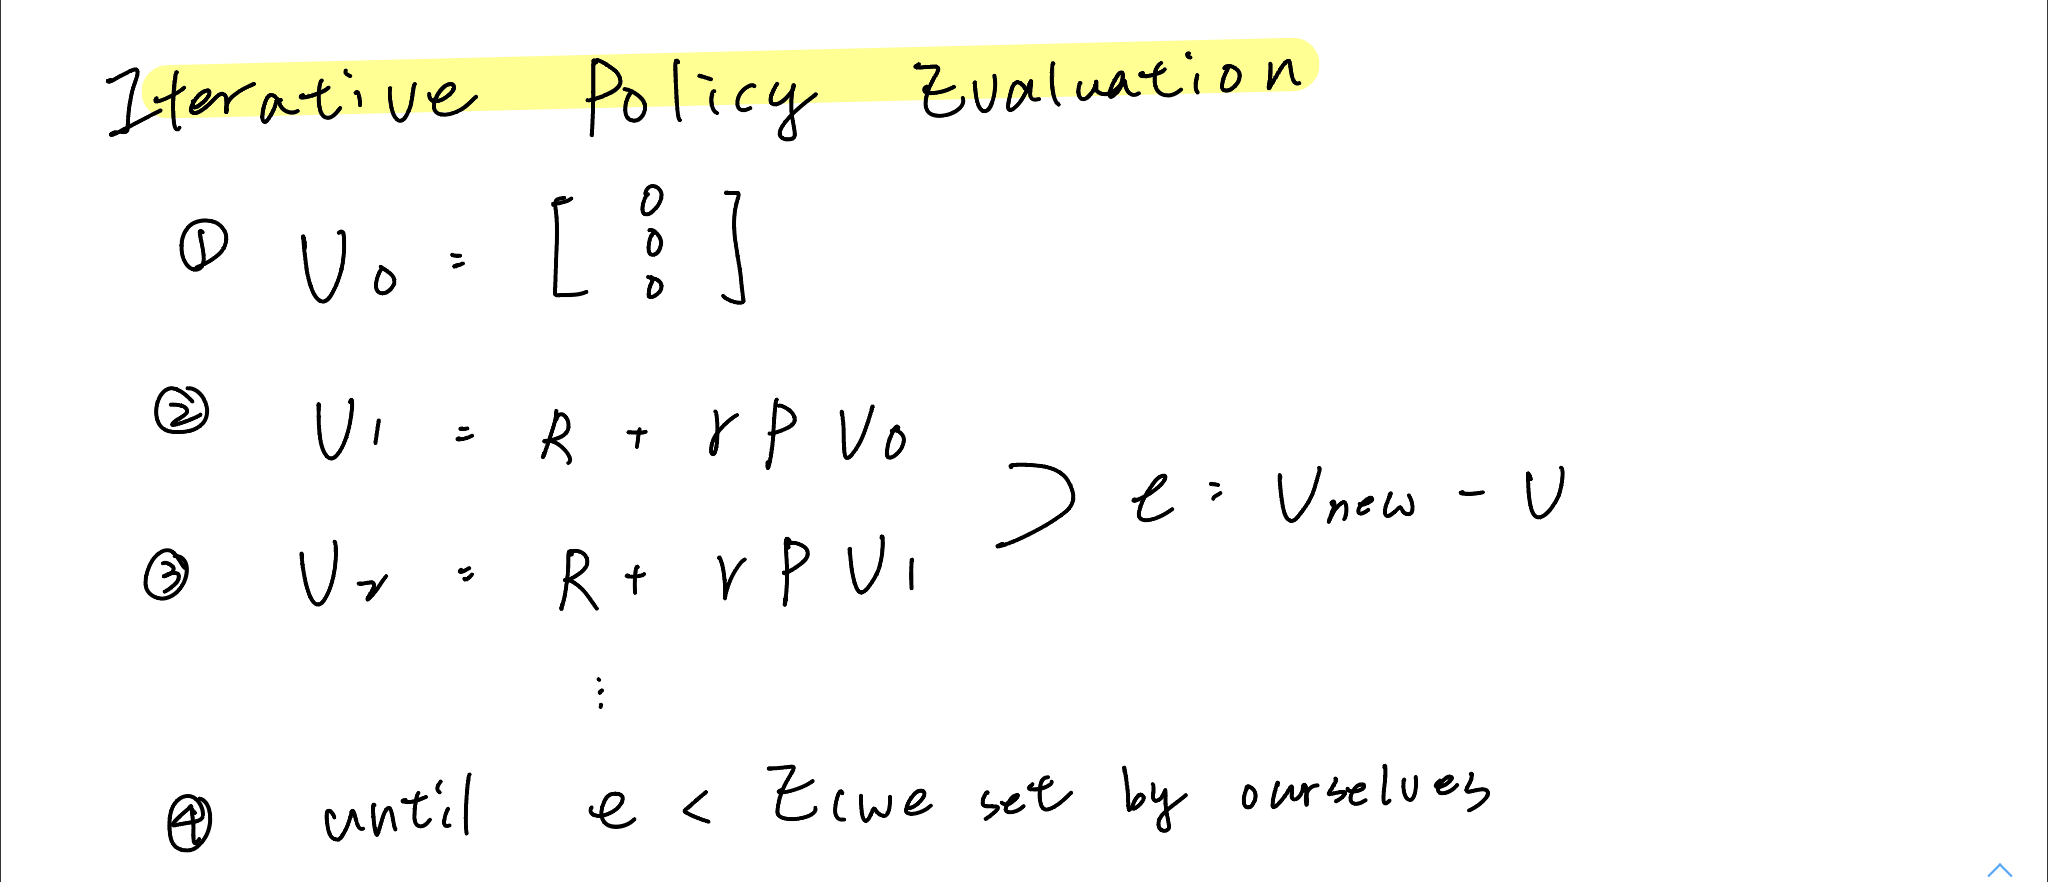

In [13]:
import jax.numpy as jnp
import jax
import matplotlib.pyplot as plt

γ = 0.95  
R = np.array([0., 1., 2.])

In [14]:
# solution with iterative pol eval
V = jnp.zeros(3)

def update(V):
    return R + γ * P @ V

for iteration in range(1000000000):
    Vnew = update(V)
    error = np.linalg.norm(Vnew - V)
    V = Vnew

    if error < 1e-8:
        break

print(V, iteration)

[ 0.       11.421729 16.026302] 119
